## Flight Fair Pridiction

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
train_data = pd.read_excel("data/Data_Train.xlsx")

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
train_data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [17]:
train_data.dropna(inplace= True)

In [18]:
train_data.shape

(10682, 11)

In [19]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

- from description we can see thst Date_of_jurney in object Data type
- therefore we have to canvert this data type into timestamps so as this column properly for prediction 

- for this we require pandas to_datetime to converts object data type to datetime dtype

In [20]:
train_data['journey_day'] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
train_data['journey_Mounth'] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
train_data.drop('Date_of_Journey' ,axis=1, inplace= True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_Mounth
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
## Eda of Dep time 

#extracting hour
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
#exatrating minute
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
# drop departure time 
train_data.drop('Dep_Time', axis=1, inplace=True)
train_data.head()

C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\3551257354.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\3551257354.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_Mounth,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
#EDA of Arrival time 

#Exatracting Hour
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
#Extracting MInutes
train_data['Arrival_Min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

#Drop The Arrival Time
train_data.drop('Arrival_Time' ,inplace=True, axis=1)
train_data.head()


C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\350986259.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\350986259.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_Min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
## Time taken By Plane is called Duraction
duration= list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # check if duration contain hour and min
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+ " 0m" # Ads 0 min
        else:
            duration[i] = "0h "+ duration[i]         # ads 0 hour


duration_hour=[]
duration_min=[]   
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [24]:
train_data['Duration_Hour'] = duration_hour
train_data['Duration_Min'] = duration_min
train_data.drop("Duration", axis =1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Cetegrical Data

1. Nominal data - data are not in order - OneHotEncoder is used
2. Ordinal data - date are in order - LabelEncoder is used

In [25]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


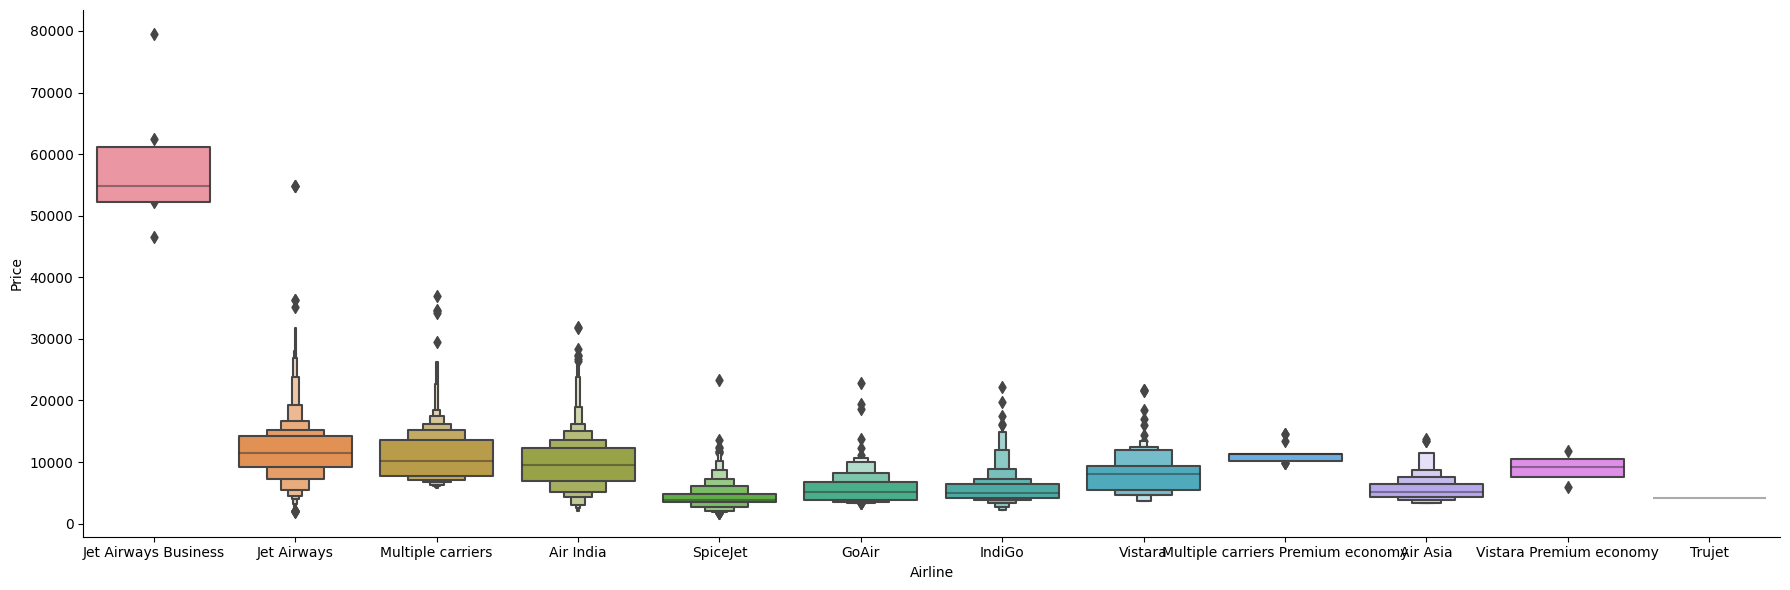

In [26]:
# Air line vs Price 

sns.catplot(y='Price', x='Airline', data=train_data.sort_values('Price',ascending=False),kind="boxen", height= 6, aspect= 3)
plt.show()

## from diagram we see jet airways business have the hights price
## reain all price almost same

In [27]:
# as air line is nominal data we will perfoem oneHotEncoding
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first=True, dtype=int)

Airline.head()



,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


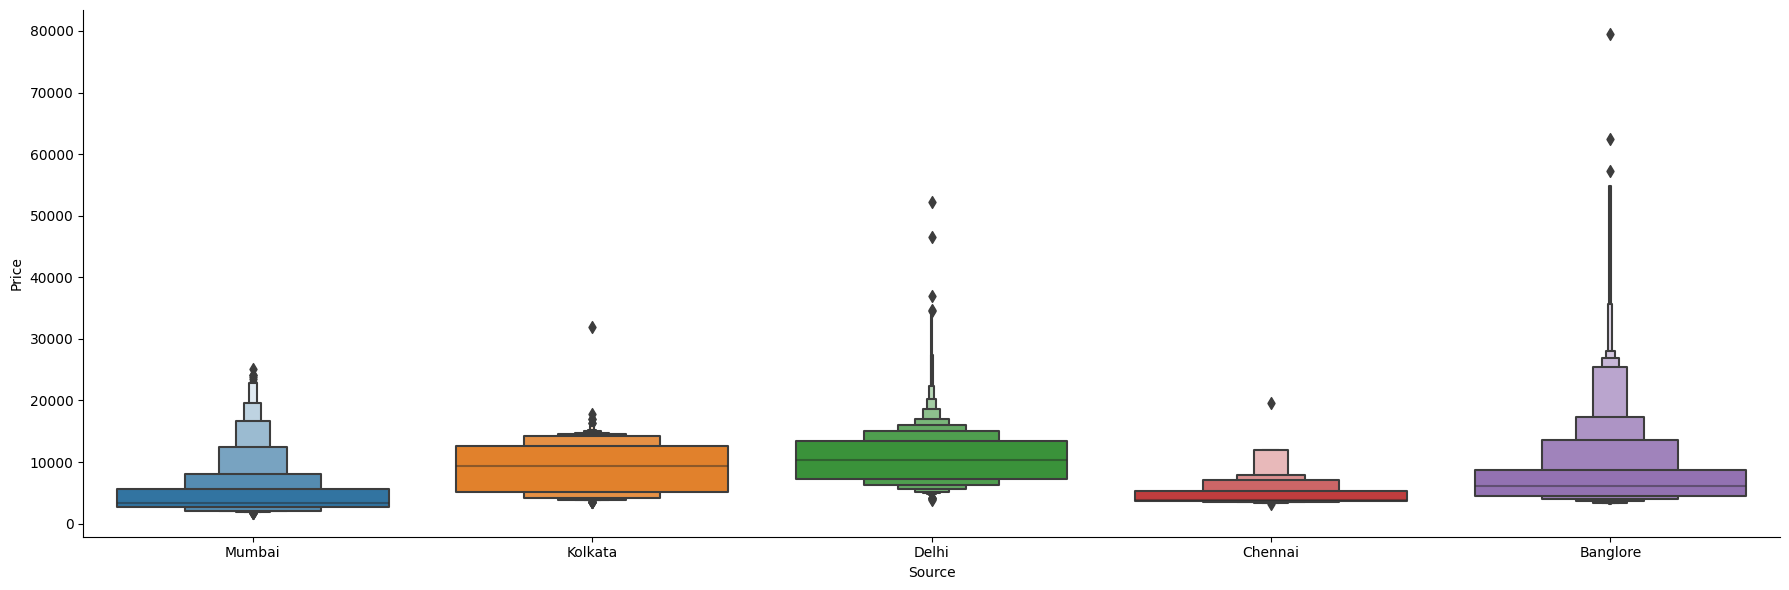

In [29]:
sns.catplot(y='Price', x='Source', data= train_data.sort_values('Source', ascending=False),kind='boxen' ,height=6, aspect=3 )
plt.show()

In [30]:
# as source is also is nominal cat data we will perform OneHotEncoding

Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True , dtype=int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


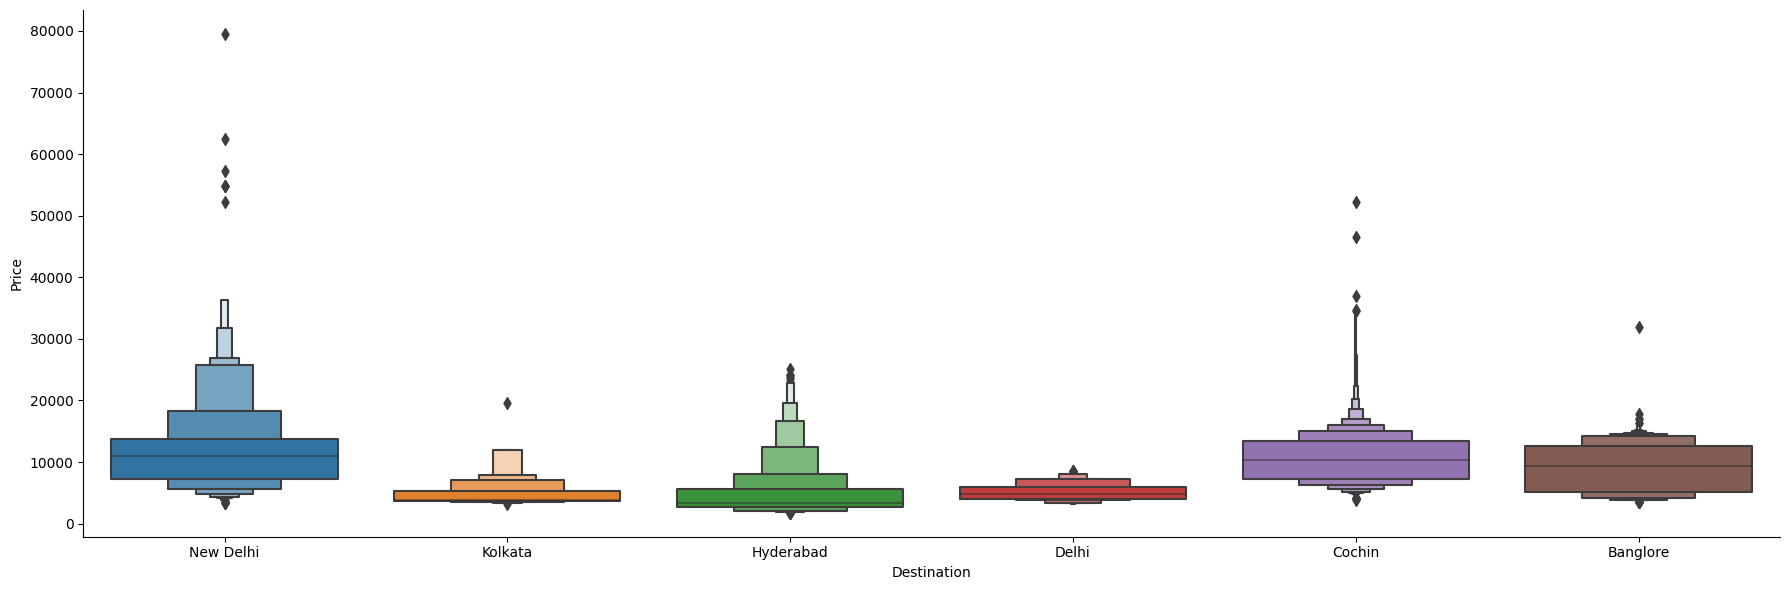

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
train_data['Destination'].value_counts()
sns.catplot(y='Price', x='Destination', data= train_data.sort_values('Destination', ascending=False),kind='boxen' ,height=6, aspect=3 )
plt.show()

# as Destination is also a Nomanal categrical data so we will perform one hot encoding 
Destination = train_data[['Destination']]
Destination= pd.get_dummies(Destination, drop_first=True , dtype=int)
Destination.head()

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
train_data.drop(['Route', 'Additional_Info'],axis=1, inplace=True)

# additinal info contain 80% of no_info data 
# route and total stops is related to each other 
# so we drop the route and Additinol info


In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [36]:
train_data['Total_Stops'].value_counts()


Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [37]:
# this type of data is categrical so we use ordinal encoding

train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True )



In [38]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [39]:
data_train = pd.concat([train_data, Airline, Source, Destination] ,axis=1)

In [40]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.drop(['Airline','Destination', 'Source'],axis=1, inplace=True)

In [42]:
data_train.head()

,Total_Stops,Price,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
data_train.shape

(10682, 30)

In [44]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   journey_day                                10682 non-null  int32
 3   journey_Mounth                             10682 non-null  int32
 4   Dep_hour                                   10682 non-null  int32
 5   Dep_min                                    10682 non-null  int32
 6   Arrival_Hour                               10682 non-null  int32
 7   Arrival_Min                                10682 non-null  int32
 8   Duration_Hour                              10682 non-null  int64
 9   Duration_Min                               10682 non-null  int64
 10  Airline_Air India                          10682 no

___________________________________________________________________________________

## Test set

In [45]:
test_data = pd.read_excel('data/Test_set.xlsx')

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
test_data['Duration'].value_counts()

Duration
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: count, Length: 320, dtype: int64

In [49]:
test_data.isnull().sum()
test_data.dropna(inplace= True)
test_data.shape

(2671, 10)

## EDA Test Data

- from description we can see thst Date_of_jurney in object Data type
- therefore we have to canvert this data type into timestamps so as this column properly for prediction 

- for this we require pandas to_datetime to converts object data type to datetime dtype

In [50]:
test_data['journey_day'] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_data['journey_Mounth'] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
test_data.drop('Date_of_Journey' ,axis=1, inplace= True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_Mounth
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [51]:
## Eda of Dep time 

#extracting hour
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
#exatrating minute
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
# drop departure time 
test_data.drop('Dep_Time', axis=1, inplace=True)
test_data.head()

C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\1059468636.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\1059468636.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_Mounth,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [52]:
#EDA of Arrival time 

#Exatracting Hour
test_data['Arrival_Hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
#Extracting MInutes
test_data['Arrival_Min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

#Drop The Arrival Time
test_data.drop('Arrival_Time' ,inplace=True, axis=1)
test_data.head()


C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\1328193054.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_Hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour


C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\1328193054.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_Min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [53]:
## Time taken By Plane is called Duraction
duration= list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # check if duration contain hour and min
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+ " 0m" # Ads 0 min
        else:
            duration[i] = "0h "+ duration[i]         # ads 0 hour


duration_hour=[]
duration_min=[]   
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [54]:
test_data['Duration_Hour'] = duration_hour
test_data['Duration_Min'] = duration_min
test_data.drop("Duration", axis =1, inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [55]:
test_data.drop(['Route', 'Additional_Info'],axis=1, inplace=True)

# additinal info contain 80% of no_info data 
# route and total stops is related to each other 
# so we drop the route and Additinol info

In [56]:
test_data.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


## Handling Cetegrical Data in the test Set

1. Nominal data - data are not in order - OneHotEncoder is used
2. Ordinal data - date are in order - LabelEncoder is used

In [57]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [58]:
# as air line is nominal data we will perfoem oneHotEncoding
Airline = test_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first=True, dtype=int)

Airline.head()



,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [59]:
test_data['Source'].value_counts()
# as source is also is nominal cat data we will perform OneHotEncoding

Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True , dtype=int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [60]:
test_data['Destination'].value_counts()


# as Destination is also a Nomanal categrical data so we will perform one hot encoding 
Destination = test_data[['Destination']]
Destination= pd.get_dummies(Destination, drop_first=True , dtype=int)

In [61]:
test_data['Total_Stops'].value_counts()

Total_Stops
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: count, dtype: int64

In [62]:
# this type of data is categrical so we use ordinal encoding

test_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True )


In [63]:
data_test= pd.concat([test_data, Airline, Source, Destination] ,axis=1)

In [64]:
data_test

,Airline,Source,Destination,Total_Stops,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,Air India,Delhi,Cochin,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [65]:
data_test.drop(['Airline','Destination', 'Source'],axis=1, inplace=True)

In [66]:
data_test.head()

,Total_Stops,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   journey_day                                2671 non-null   int32
 2   journey_Mounth                             2671 non-null   int32
 3   Dep_hour                                   2671 non-null   int32
 4   Dep_min                                    2671 non-null   int32
 5   Arrival_Hour                               2671 non-null   int32
 6   Arrival_Min                                2671 non-null   int32
 7   Duration_Hour                              2671 non-null   int64
 8   Duration_Min                               2671 non-null   int64
 9   Airline_Air India                          2671 non-null   int32
 10  Airline_GoAir                              2671 

## Feature Selection 

- finding the best feature following the some feature selection tecniquies

1. heatmap
2. feature_importence_
3. Selectkbest

In [68]:
data_train.shape

(10682, 30)

In [69]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_Mounth', 'Dep_hour',
       'Dep_min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [70]:
x = data_train.loc[:,['Total_Stops', 'journey_day', 'journey_Mounth', 'Dep_hour',
       'Dep_min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journey_day,journey_Mounth,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [72]:
! pip install sklearn
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2971 sha256=20b23ac6b51f2e4707e3903378111c6b968ea426229abc14732a73f3e3cd5429
  Stored in directory: c:\users\uzair choudhary\appdata\local\pip\cache\wheels\bc\86\46\dd4e366dc5e1303b4d6927d2a603a1ae7f979d488a5d202330
Successfully built sklearn


ExtraTreesRegressor()

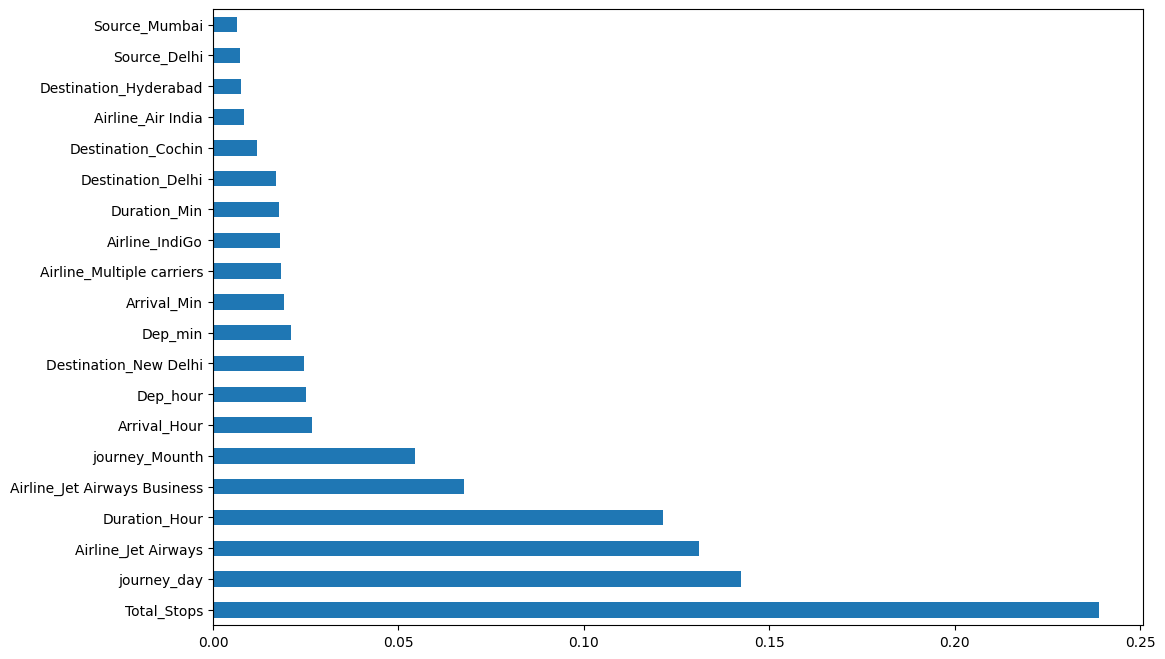

In [73]:
plt.figure(figsize= (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
   -  Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
y_pred = reg_rf.predict(x_test)

In [77]:
reg_rf.score(x_test, y_test)

0.7972534850803374

C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


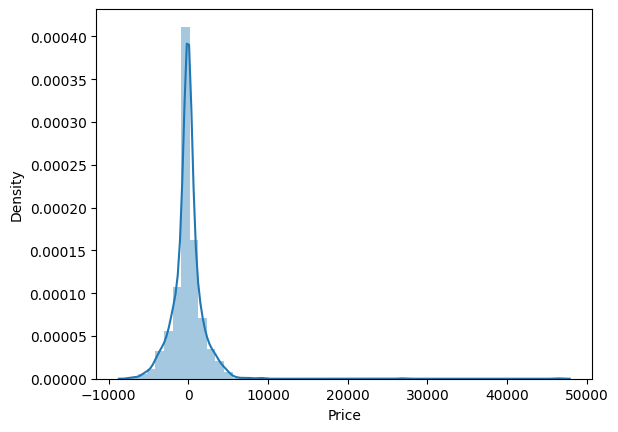

In [78]:
sns.distplot(y_test-y_pred)
plt.show()

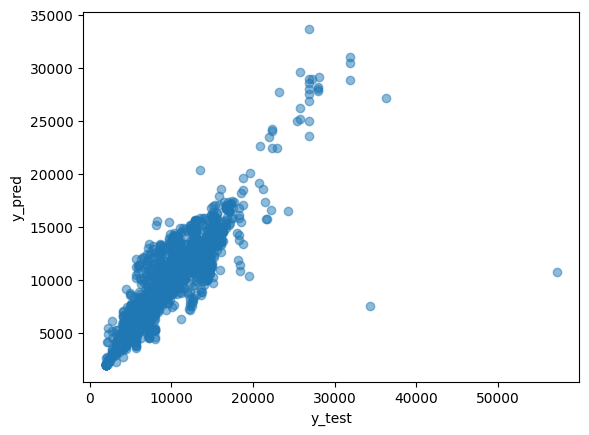

In [79]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [80]:
from sklearn import metrics


In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1172.9053013520434
MSE: 4371631.774225271
RMSE: 2090.844751344602


In [82]:
metrics.r2_score(y_test, y_pred)

0.7972534850803374

## Hyperparameter Tuning

- Choose following method for hyperparameter tuning
    1. RandomizedSearchCV --> Fast
    2. GridSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [85]:
# create the random Grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_split,
                'min_samples_leaf': min_samples_leaf }

In [86]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [87]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=aut

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=1100; total time=  35.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=1100; total time=  31.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=1100; total time=  42.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=1100; total time=  57.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=1100; total time=  52.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, n_estimators=700; total time=   0.0s
[CV] 

c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ML Projects\Flight Fair Pridction\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [89]:
prediction = rf_random.predict(x_test
)

C:\Users\UZAIR CHOUDHARY\AppData\Local\Temp\ipykernel_8292\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


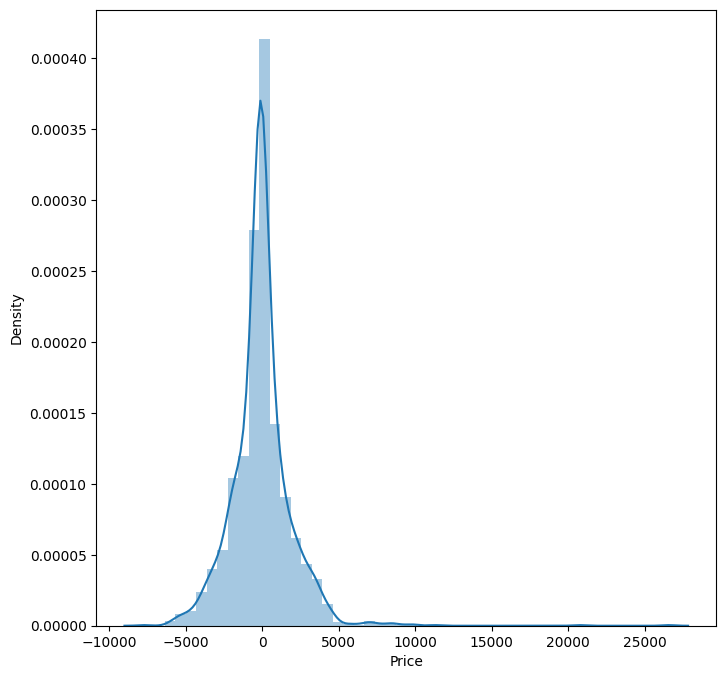

In [90]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

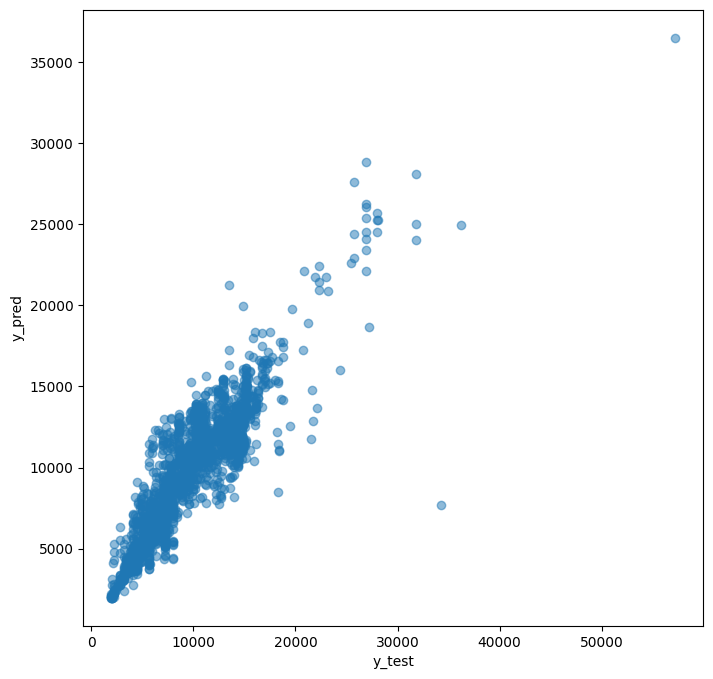

In [91]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1255.484701375982
MSE: 3833123.3477645647
RMSE: 1957.8363945346825


## Save the model to reuse it again

In [93]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [94]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [95]:
y_prediction = forest.predict(x_test)


In [96]:
metrics.r2_score(y_test, y_prediction)


0.7972534850803374